<a href="https://colab.research.google.com/github/FiyinfobaO/Hamoye/blob/master/Final_kaggle_Hamoye_stageD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting google drive 
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# copying the kaggle zip files already saved on the drive to kaggle file directory
!cp "/content/drive/My Drive/kaggle.zip" "/content/"
!cp "/content/drive/My Drive/additional.zip" "/content/"

In [3]:
# unzipping the files
%%capture
!unzip '/content/additional.zip' 

In [4]:
%%capture
!unzip '/content/kaggle.zip'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


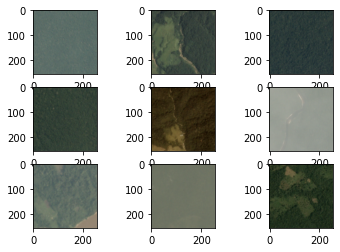

In [5]:
# importing libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot
from matplotlib.image import imread
import scipy
import sys
import os
%matplotlib inline


# to visualize some of the images from the train data
folder = '/content/planet/train-jpg/'  #location/directory of the train data

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'train_' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    
# show the figure
pyplot.show()

In [6]:
# loading the labels
labels_df = pd.read_csv('/content/planet/train_classes.csv')
print(labels_df.shape)
labels_df.head()

(40479, 2)


image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

In [7]:
# to create a list of the unique labels
label_list = []
for l in labels_df['tags'].values:
    labels = l.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
            
print('No of labels:', len(label_list))
print('unsorted labels: ', label_list)

# to sort the labels 
label_list.sort()
print('sorted list: ', label_list)

No of labels: 17
unsorted labels:  ['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']
sorted list:  ['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water']


In [8]:
# mapping the labels to integers
labels_map = {label_list[i]: i for i in range(len(label_list))}
inv_labels_map = {i: label_list[i] for i in range(len(label_list))}
print('label mapping: ', labels_map)
print('////////////////////////////')
print('inverse label mapping: ', inv_labels_map)

label mapping:  {'agriculture': 0, 'artisinal_mine': 1, 'bare_ground': 2, 'blooming': 3, 'blow_down': 4, 'clear': 5, 'cloudy': 6, 'conventional_mine': 7, 'cultivation': 8, 'habitation': 9, 'haze': 10, 'partly_cloudy': 11, 'primary': 12, 'road': 13, 'selective_logging': 14, 'slash_burn': 15, 'water': 16}
////////////////////////////
inverse label mapping:  {0: 'agriculture', 1: 'artisinal_mine', 2: 'bare_ground', 3: 'blooming', 4: 'blow_down', 5: 'clear', 6: 'cloudy', 7: 'conventional_mine', 8: 'cultivation', 9: 'habitation', 10: 'haze', 11: 'partly_cloudy', 12: 'primary', 13: 'road', 14: 'selective_logging', 15: 'slash_burn', 16: 'water'}


In [9]:
# mapping the filenames to tags
file_map = dict()
for i in range(len(labels_df)):
    name, tags = labels_df['image_name'][i], labels_df['tags'][i]
    file_map[name] = tags.split(' ')
file_map

{'train_0': ['haze', 'primary'],
 'train_1': ['agriculture', 'clear', 'primary', 'water'],
 'train_2': ['clear', 'primary'],
 'train_3': ['clear', 'primary'],
 'train_4': ['agriculture', 'clear', 'habitation', 'primary', 'road'],
 'train_5': ['haze', 'primary', 'water'],
 'train_6': ['agriculture', 'clear', 'cultivation', 'primary', 'water'],
 'train_7': ['haze', 'primary'],
 'train_8': ['agriculture', 'clear', 'cultivation', 'primary'],
 'train_9': ['agriculture', 'clear', 'cultivation', 'primary', 'road'],
 'train_10': ['agriculture', 'clear', 'primary', 'slash_burn', 'water'],
 'train_11': ['clear', 'primary', 'water'],
 'train_12': ['cloudy'],
 'train_13': ['clear', 'primary'],
 'train_14': ['cloudy'],
 'train_15': ['clear', 'primary'],
 'train_16': ['clear', 'primary'],
 'train_17': ['partly_cloudy', 'primary'],
 'train_18': ['clear', 'primary'],
 'train_19': ['agriculture', 'clear', 'primary', 'road'],
 'train_20': ['agriculture', 'clear', 'primary', 'water'],
 'train_21': ['clea

In [10]:
# functions to carry out the mapping of tags to unique integer values
def create_map_tag(labels_df):
    # to create a list of the unique labels
    label_list = []
    for l in labels_df['tags'].values:
        labels = l.split(' ')
        for label in labels:
            if label not in label_list:
                label_list.append(label)
    # to sort the labels 
    label_list.sort()
    # mapping the labels to integers
    labels_map = {label_list[i]: i for i in range(len(label_list))}
    inv_labels_map = {i: label_list[i] for i in range(len(label_list))}
    return labels_map, inv_labels_map

# function to carry out mapping of filenames to tags
def create_map_file(labels_df):
    file_map = {}
    for i in range(len(labels_df)):
        name, tags = labels_df['image_name'][i], labels_df['tags'][i]
        file_map[name] = tags.split(' ')
    return file_map

# one-hot encoding function to convert the tags list
def one_hot_encoder(tags, mapping):
    encode = np.zeros(len(mapping), dtype='uint8')
    # assigning 1 for each tag in the vector
    for t in tags:
        encode[mapping[t]] = 1
    return encode

In [11]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# function to load all the train images and labels
def load_dataset(train_path, file_map, tag_map):
    images, labels = [], []
    for filenames in os.listdir(train_path):
        # loading the image
        image = load_img(train_path + filenames, target_size=(75, 75))
        # converting image to numpy array
        image = img_to_array(image, dtype='uint8')
        # getting the tags for each of the filenames
        tags = file_map[filenames[:-4]]
        # one-hot encoding the tags to create the labels
        label = one_hot_encoder(tags, tag_map)
        # storing the image array and labels in the empty list 
        images.append(image)
        labels.append(label)
    
    # creating the image feature, X and label, y
    X = np.asarray(images, dtype='uint8')
    y = np.asarray(labels, dtype='uint8')
    return X, y

In [ ]:
# to create the training data

# map the tags to integers
labels_map, inv_labels_map = create_map_tag(labels_df)
# map the filenames to tags
file_map = create_map_file(labels_df)
# loading the features and labels
X, y = load_dataset(folder, file_map, labels_map)
print(X.shape, y.shape)
# saving the dataset in a compressed numpy format
np.savez_compressed('train_dataset.npz', a=X, b=y)

In [12]:
# copying the train and test dataset already saved on drive to kaggle directory
!cp '/content/drive/My Drive/train_dataset.npz' '/content/'
!cp '/content/drive/My Drive/test_dataset.npz' '/content/'

In [13]:
# loading the train dataset
dataset = np.load('train_dataset.npz')
X, y = dataset['a'], dataset['b']
print('loaded dataset shape: ', X.shape, y.shape)

loaded dataset shape:  (40479, 75, 75, 3) (40479, 17)


In [14]:
# function to calculate fbeta score as a metric
def fbeta(ytrue, ypred, beta=2, epsilon=1e-4):
    ytrue = tf.cast(ytrue, tf.float32)
    ypred = tf.cast(tf.greater(tf.cast(ypred, tf.float32), tf.constant(0.5)), tf.float32)

    beta_squared = beta ** 2
    # calculate true +ve, false +ve and false -ve elements
    tp = tf.reduce_sum(ytrue * ypred, axis=1)
    fp = tf.reduce_sum(ypred, axis=1) - tp
    fn = tf.reduce_sum(ytrue, axis=1) - tp

    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    
    return (beta_squared + 1) * precision * recall / (beta_squared * precision + recall + epsilon)

In [15]:
from sklearn.model_selection import train_test_split
# to split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train set: ', X_train.shape, y_train.shape)
print('Validation set: ', X_val.shape, y_val.shape)

Train set:  (32383, 75, 75, 3) (32383, 17)
Validation set:  (8096, 75, 75, 3) (8096, 17)


In [16]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
BATCH_SIZE = 64
# creating train and validation generators
image_gen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    channel_shift_range=10.,
    fill_mode='nearest'
)
train_data_gen = image_gen_train.flow(X_train, 
                                      y_train, 
                                      batch_size=BATCH_SIZE,
                                      shuffle=True)
image_gen_val = ImageDataGenerator(preprocessing_function=preprocess_input)
val_data_gen = image_gen_val.flow(X_val,
                                  y_val, 
                                  batch_size=BATCH_SIZE)

In [17]:
import gc
# to clear and free up space in memory
gc.collect()

0

#Creating the Model
Using Transfer Learning with Vgg 16

In [18]:
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model

# creating the model
pre_trained_model = VGG16(input_shape=(75, 75, 3), 
                                include_top=False, weights='imagenet')
for layer in pre_trained_model.layers:
    layer.trainable = False

# allowing last vgg block to be trainable
pre_trained_model.get_layer('block5_conv1').trainable = True
pre_trained_model.get_layer('block5_conv2').trainable = True
pre_trained_model.get_layer('block5_conv3').trainable = True
pre_trained_model.get_layer('block5_pool').trainable = True
	
# Flatten the output layer to 1 dimension
x = Flatten()(pre_trained_model.layers[-1].output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = Dense(17, activation='sigmoid')(x)

model = Model(
    pre_trained_model.input,
    x
)
model.summary()
# compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=[fbeta])

58892288/58889256 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_______________________________________________________

In [19]:
gc.collect()

0

In [20]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# setting early stopping callback to help prevent overfitting
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=35)
# setting model checkpoint to save the best model weights 
mc = ModelCheckpoint('final_model.hdf5', monitor='val_fbeta', mode='max', verbose=1, save_best_only=True, save_weights_only=True)
# fit the model
EPOCHS = 150
history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    steps_per_epoch=506,
    epochs=EPOCHS,
    validation_steps=127,
    verbose=2, 
    callbacks=[es, mc])

Epoch 1/150

Epoch 00001: val_fbeta improved from -inf to 0.85745, saving model to final_model.hdf5
506/506 - 62s - loss: 0.1852 - fbeta: 0.7951 - val_loss: 0.1267 - val_fbeta: 0.8575
Epoch 2/150

Epoch 00002: val_fbeta improved from 0.85745 to 0.85922, saving model to final_model.hdf5
506/506 - 62s - loss: 0.1418 - fbeta: 0.8393 - val_loss: 0.1198 - val_fbeta: 0.8592
Epoch 3/150

Epoch 00003: val_fbeta improved from 0.85922 to 0.87202, saving model to final_model.hdf5
506/506 - 62s - loss: 0.1315 - fbeta: 0.8493 - val_loss: 0.1159 - val_fbeta: 0.8720
Epoch 4/150

Epoch 00004: val_fbeta improved from 0.87202 to 0.87426, saving model to final_model.hdf5
506/506 - 63s - loss: 0.1267 - fbeta: 0.8547 - val_loss: 0.1099 - val_fbeta: 0.8743
Epoch 5/150

Epoch 00005: val_fbeta improved from 0.87426 to 0.87664, saving model to final_model.hdf5
506/506 - 62s - loss: 0.1234 - fbeta: 0.8606 - val_loss: 0.1143 - val_fbeta: 0.8766
Epoch 6/150

Epoch 00006: val_fbeta did not improve from 0.87664
506

In [21]:
gc.collect()

84

In [22]:
!cp "/content/final_model.hdf5" "/content/drive/My Drive/"  # saving the model to drive

In [ ]:
# setting the path to the test images
test_path1 = '/content/planet/test-jpg'
test_path2 = '/content/test-jpg-additional'

In [37]:
# loading the submission csv
sub = pd.read_csv('/content/planet/sample_submission.csv')

In [ ]:
# loading test images
images = []
for filename in sub['image_name']:
  if filename[:1] == 't':
    img = load_img(test_path1 + '/' + filename + '.jpg', target_size=(75, 75))
  elif filename[:1] == 'f':
    img = load_img(test_path2 + '/' + filename + '.jpg', target_size=(75, 75))
  # converting image to numpy array
  image = img_to_array(img, dtype='uint8')
  # storing the image array and labels in the empty list 
  images.append(image)
    
# creating the image feature, X 
X_test = np.asarray(images, dtype='uint8')
X_test.shape

In [ ]:
gc.collect()

In [ ]:
# saving the test dataset in a compressed numpy format
np.savez_compressed('test_dataset.npz', a=X_test)

In [23]:
# to read/load the test data saved 
test_data = np.load('test_dataset.npz')
X_test = test_data['a']
X_test.shape

(61191, 75, 75, 3)

In [24]:
gc.collect()

31

In [25]:
# generate test images using image data generator
image_gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data_gen = image_gen_test.flow(X_test, 
                                    shuffle=False, 
                                    batch_size=64)

In [26]:
gc.collect()

28

In [27]:
len(test_data_gen)

957

In [28]:
# make predictions
model.load_weights('/content/final_model.hdf5')
prediction = model.predict(test_data_gen, steps=957)

In [29]:
# prediction shape
prediction.shape

(61191, 17)

In [30]:
gc.collect()

4

In [31]:
# moving the predictions to a dataframe
pred = pd.DataFrame(prediction, columns=label_list)
pred

agriculture  artisinal_mine  ...    slash_burn     water
0         0.015462    4.510009e-06  ...  1.001430e-04  0.011845
1         0.020310    3.804098e-05  ...  3.019831e-04  0.025383
2         0.012323    1.511469e-08  ...  1.064889e-07  0.030272
3         0.254031    5.928798e-05  ...  8.777137e-04  0.043893
4         0.065304    5.041607e-05  ...  3.248537e-04  0.175811
...            ...             ...  ...           ...       ...
61186     0.000012    6.999831e-20  ...  1.553903e-14  0.000020
61187     0.154476    1.109964e-03  ...  8.069503e-03  0.999769
61188     0.020308    4.172793e-05  ...  7.688832e-05  0.175735
61189     0.001774    2.787847e-09  ...  1.916022e-08  0.005388
61190     0.123102    3.016802e-07  ...  1.147269e-06  0.066593

[61191 rows x 17 columns]

In [32]:
tags = pred.columns 

In [33]:
# to get the actual tags for each image
pred_tags = pred.apply(lambda x: " ".join(tags[x>0.5]), axis=1)

In [34]:
gc.collect()

0

In [35]:
pred_tags

0                          clear primary
1                          clear primary
2                  partly_cloudy primary
3                          clear primary
4                  partly_cloudy primary
                      ...               
61186                             cloudy
61187    clear cultivation primary water
61188                      clear primary
61189                             cloudy
61190      clear habitation primary road
Length: 61191, dtype: object

In [38]:
sub1 = sub.copy() # a copy of the originall submission csv file
new_sub = sub1.drop('tags', axis=1) # dropping the tag column
new_sub

image_name
0         test_0
1         test_1
2         test_2
3         test_3
4         test_4
...          ...
61186  file_9995
61187  file_9996
61188  file_9997
61189  file_9998
61190  file_9999

[61191 rows x 1 columns]

In [39]:
# setting the tag column to the new predictions
new_sub['tags'] = pred_tags

In [40]:
new_sub

image_name                             tags
0         test_0                    clear primary
1         test_1                    clear primary
2         test_2            partly_cloudy primary
3         test_3                    clear primary
4         test_4            partly_cloudy primary
...          ...                              ...
61186  file_9995                           cloudy
61187  file_9996  clear cultivation primary water
61188  file_9997                    clear primary
61189  file_9998                           cloudy
61190  file_9999    clear habitation primary road

[61191 rows x 2 columns]

In [41]:
# converting to csv
new_sub.to_csv('8final.csv', index=False)

In [42]:
assert sum(sub['image_name'] == new_sub['image_name']) == 61191

In [43]:
# download the csv to laptop
from google.colab import files
files.download('8final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>